# 📊 Análisis de Casos COVID ‑ Formosa: Flujo ETL y Exploración de Datos

> ⚙️ *Este notebook concentra el ciclo completo de procesamiento masivo de datos COVID‑19 en Argentina, con foco en la provincia de Formosa.*  
> 💾 **Volumen inicial:** 6 GB, 30 millones de registros  
> 🗓️ **Período:** 01/03/2020 – 04/06/2022

---

## 📋 Resumen del trabajo

- 🔢 **Total de registros:** `797.429`
- 📄 **Total de columnas:** `25`  
- 📌 **Alcance:** Dataset filtrado exclusivamente para la provincia de Formosa
- 🧠 **Objetivo:** Comprender la evolución temporal, distribución geográfica y características demográficas de los casos COVID en Formosa

---

## 🧭 1. ¿Por qué este análisis?

Este trabajo consiste en seleccionar un dataset de preferencia, en este caso vamos a trabajar con el dataset que cuenta con la información de "Casos de Covid19 durante la pandemia"

limitando el alcance del dataset y trabajando unicamente con los datos que pertenezcan a la provincia de Formosa.

Se busca proporcionar un análisis histórico y demográfico de los casos registrados y confirmados.

En su momento fue un tema de interés y preocupación para la población, donde semana tras semana se publicaba un reporte semanal con datos actualizados de la situación epidemiológica del país y cada provincia.


---

## 🎯 2. Objetivos

### 🔄 Flujo ETL Completo

1. **📥 Extracción**: Leer los datos por bloques y seleccionar solo Formosa.  
2. **🧹 Transformación**: Estandarizar, limpiar y validar.  
3. **💾 Carga**: Exportar los datos listos para análisis.

### 🔬 Exploración y Visualización

4. **📊 Estadísticas**: 
   - Casos totales por departamento y localidad
   - Fallecimientos por grupo etario y género
   - Clasificaciones de casos (confirmados, sospechosos)
   - Pacientes en cuidados intensivos
   - Tiempo entre diagnóstico y primeros síntomas
   - Casos por semana epidemiológica
   - Índice de mortalidad en personas jóvenes (<30 años)
   - Uso de asistencia respiratoria mecánica por edad

5. **📈 Gráficos**: 
   - Series de tiempo para evolución de casos
   - Distribución geográfica de severidad
   - Análisis demográfico por género y edad
   - Comparativas entre clasificaciones y resultados

---

## 🛠️ 3. Metodología ETL Unificada

### 📤 3.1 Ingestión por Fragmentos

- ✅ Selección de columnas clave: `provincia`, `fecha_inicio_sintomas`, `clasificacion`, `fallecido`.  
- ✅ Filtro temprano: conservar solo **Formosa**.

### 🧼 3.2 Limpieza de Datos

- 🗃️ Normalización de fechas y categorías.  

## 📊 4. Análisis Exploratorio

### 📌 4.1 Estadísticas Básicas

- 🔢 Total de casos registrados por departamento.  
- ⚰️ Cantidad de fallecimientos por grupo etario y género.  
- 🧾 Clasificación por tipo de caso (confirmado, sospechoso, etc.).
- 🏥 Casos que requirieron atención en UCI.

### 📅 4.2 Tendencias Temporales

- 📆 Evolución diaria y acumulada.  
- 🚨 Detección de picos y brotes.
- 📊 Cantidad de infectados por semana epidemiológica.

### 🧮 4.3 Métricas Derivadas

- ⏱️ Intervalo entre diagnóstico y aparición de síntomas.
- 👶 Índice de mortalidad en personas menores de 30 años.
- 👥 Análisis de mortalidad por género.
- 🫁 Pacientes que necesitaron asistencia respiratoria mecánica por edad.

---

## 📈 5. Visualización de Resultados

- 📍 **Línea temporal**: Casos diarios acumulados.  
- 🧱 **Histograma**: Intervalos clave entre eventos clínicos.  
- 🧮 **Gráfico de barras**: Asociación entre tipo de caso y desenlace.
- 🗺️ **Mapas geográficos**: Distribución de casos y severidad usando geopandas o folium.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Se carga el dataset de casos de COVID-19 desde un archivo CSV.

In [2]:
df = pd.read_csv('Covid19Casos.csv')

Se filtran los datos para trabajar exclusivamente con registros correspondientes a la provincia de Formosa.

```python
Se crea un nuevo DataFrame formosa_df que contiene solo las filas en las que la columna "residencia_provincia_nombre" es igual a "Formosa".

In [3]:
formosa_df = df[df['residencia_provincia_nombre'] == 'Formosa']

Luego se restablecen los índices y se sobrescribe el DataFrame original df con esta versión filtrada.

In [4]:
formosa_df = formosa_df.reset_index(drop=True)
df = formosa_df.copy()

Se visualizan los primeros registros,

In [5]:
df.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000007,M,27.0,Años,Argentina,Formosa,Patiño,Formosa,NaN,2020-06-01,...,NaN,NO,34,Público,Caso confirmado por laboratorio - No Activo po...,Confirmado,34,2020-06-25,35,2022-06-05
1,1000081,M,59.0,Años,Argentina,Formosa,Laishi,Formosa,NaN,2020-06-01,...,NaN,NO,34,Público,Caso confirmado por laboratorio - No Activo po...,Confirmado,34,2020-06-20,21,2022-06-05
2,1000138,M,38.0,Años,Argentina,Formosa,Laishi,Formosa,NaN,2020-06-01,...,NaN,NO,34,Público,Caso confirmado por laboratorio - No Activo po...,Confirmado,34,2020-06-25,21,2022-06-05
3,10002306,F,56.0,Años,Argentina,Formosa,Pilagás,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,34,2021-04-06,42,2022-06-05
4,10002477,M,56.0,Años,Argentina,Formosa,Pilcomayo,Formosa,NaN,2021-04-08,...,NaN,NO,34,Público,Caso Descartado,Descartado,34,2021-04-08,49,2022-06-05


el tamaño del dataset,

In [6]:
print(f'Cantidad de registros: {df.shape[0]}', end=' / ')
print(f'Cantidad de columnas: {df.shape[1]}')

Cantidad de registros: 797429 / Cantidad de columnas: 25


 y los tipos de datos.

In [7]:
df.dtypes

id_evento_caso                        int64
sexo                                 object
edad                                float64
edad_años_meses                      object
residencia_pais_nombre               object
residencia_provincia_nombre          object
residencia_departamento_nombre       object
carga_provincia_nombre               object
fecha_inicio_sintomas                object
fecha_apertura                       object
sepi_apertura                         int64
fecha_internacion                    object
cuidado_intensivo                    object
fecha_cui_intensivo                  object
fallecido                            object
fecha_fallecimiento                  object
asistencia_respiratoria_mecanica     object
carga_provincia_id                    int64
origen_financiamiento                object
clasificacion                        object
clasificacion_resumen                object
residencia_provincia_id               int64
fecha_diagnostico               

### Columnas Irrelevantes para el Análisis

Hemos delimitado previamente el alcance del análisis, por lo que hay varias columnas que no son relevantes:

- **Ubicación**: País y nombre de la provincia.
- **Datos Administrativos**: 
    - Origen del financiamiento.
    - ID de carga de la provincia.
    - Última actualización.
    - ID del departamento de residencia.
    - ID de la provincia de residencia.

In [8]:
drop_cols = []

drop_cols.append('id_evento_caso')
drop_cols.append('residencia_pais_nombre')
drop_cols.append('residencia_provincia_nombre')
drop_cols.append('carga_provincia_nombre')
drop_cols.append('origen_financiamiento')
drop_cols.append('clasificacion')
drop_cols.append('carga_provincia_id')
drop_cols.append('ultima_actualizacion')
drop_cols.append('residencia_departamento_id')
drop_cols.append('residencia_provincia_id')

print(drop_cols)

['id_evento_caso', 'residencia_pais_nombre', 'residencia_provincia_nombre', 'carga_provincia_nombre', 'origen_financiamiento', 'clasificacion', 'carga_provincia_id', 'ultima_actualizacion', 'residencia_departamento_id', 'residencia_provincia_id']


In [9]:
df.drop(columns=drop_cols, inplace=True)

In [10]:
print(f'Columnas restantes: {df.columns}')

Columnas restantes: Index(['sexo', 'edad', 'edad_años_meses', 'residencia_departamento_nombre',
       'fecha_inicio_sintomas', 'fecha_apertura', 'sepi_apertura',
       'fecha_internacion', 'cuidado_intensivo', 'fecha_cui_intensivo',
       'fallecido', 'fecha_fallecimiento', 'asistencia_respiratoria_mecanica',
       'clasificacion_resumen', 'fecha_diagnostico'],
      dtype='object')


Se renombran columnas claves para mejorar la comprensión, por ejemplo:

- `residencia_provincia_nombre` → `provincia`

- `clasificacion_resumen` → `clasificacion_caso`

- `cuidado_intensivo → requirio_uci`

In [11]:
renombres = {
    'residencia_departamento_nombre': 'departamento_residencia',
    'fecha_inicio_sintomas': 'fecha_inicio_sintomas',
    'sepi_apertura': 'sem_epidemiologica',
    'cuidado_intensivo': 'requirio_uci', 
    'fecha_cui_intensivo': 'fecha_ingreso_uci',
    'fallecido': 'indicador_fallecimiento',
    'fecha_fallecimiento': 'fecha_fallecimiento',
    'asistencia_respiratoria_mecanica': 'requirio_arm',
    'clasificacion_resumen': 'clasificacion_caso',
}

df.rename(columns=renombres, inplace=True)


In [12]:
df.columns

Index(['sexo', 'edad', 'edad_años_meses', 'departamento_residencia',
       'fecha_inicio_sintomas', 'fecha_apertura', 'sem_epidemiologica',
       'fecha_internacion', 'requirio_uci', 'fecha_ingreso_uci',
       'indicador_fallecimiento', 'fecha_fallecimiento', 'requirio_arm',
       'clasificacion_caso', 'fecha_diagnostico'],
      dtype='object')

Se convierten todas las columnas de fecha a formato datetime, lo que facilita análisis temporales.

utilizando `pd.to_datetime()`

In [13]:
df['fecha_inicio_sintomas'] = pd.to_datetime(df['fecha_inicio_sintomas'], errors='coerce')
df['fecha_apertura'] = pd.to_datetime(df['fecha_apertura'], errors='coerce')
df['fecha_internacion'] = pd.to_datetime(df['fecha_internacion'], errors='coerce')
df['fecha_ingreso_uci'] = pd.to_datetime(df['fecha_ingreso_uci'], errors='coerce')
df['fecha_fallecimiento'] = pd.to_datetime(df['fecha_fallecimiento'], errors='coerce')
df['fecha_diagnostico'] = pd.to_datetime(df['fecha_diagnostico'], errors='coerce')

In [14]:
df.dtypes

sexo                               object
edad                              float64
edad_años_meses                    object
departamento_residencia            object
fecha_inicio_sintomas      datetime64[ns]
fecha_apertura             datetime64[ns]
sem_epidemiologica                  int64
fecha_internacion          datetime64[ns]
requirio_uci                       object
fecha_ingreso_uci          datetime64[ns]
indicador_fallecimiento            object
fecha_fallecimiento        datetime64[ns]
requirio_arm                       object
clasificacion_caso                 object
fecha_diagnostico          datetime64[ns]
dtype: object

In [15]:
df['edad_años_meses'].value_counts()

edad_años_meses
Años     797170
Meses       259
Name: count, dtype: int64

In [16]:
print(f"edad máxima: {df['edad'].max()}")
print(f"edad minima: {df['edad'].min()}")

edad máxima: 222.0
edad minima: 1.0


In [17]:
df[df['edad_años_meses'] == 'Meses' ].edad.unique()

array([11., 10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

In [18]:
binarias = ['requirio_uci', 'requirio_arm', 'indicador_fallecimiento']
categoricas = ['sexo', 'departamento_residencia']

In [19]:
for col in binarias:
    df[col] = df[col].apply(lambda x: 1 if x == 'SI' else 0)

In [20]:
for col in categoricas:
    df[col] = df[col].astype('category')

In [21]:
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')

In [22]:
df['edad_estandarizada'] = df.apply(
    lambda row: row['edad'] / 12 if row['edad_años_meses'] == 'Meses' else row['edad'],
    axis=1
)

In [23]:
# Filtrar edades válidas
df = df[(df['edad_estandarizada'] >= 0) & (df['edad_estandarizada'] <= 105)]

In [24]:
# Crear grupos etarios
df['grupo_edad'] = pd.cut(
    df['edad_estandarizada'],
    bins=[0, 2, 12, 18, 30, 50, 65, 100, 105],
    labels=['0-2', '3-12', '13-18', '19-30', '31-50', '51-65', '65-100', '100+']
)

In [25]:
df = df[df['edad_años_meses'] != 'Meses' ]

# Ya que los valores se en la misma columna, podemos eliminar la columna "edad_años_meses"
df.drop(columns='edad_años_meses', inplace=True)

In [26]:
df['clasificacion_caso'] = df['clasificacion_caso'].astype('category')

In [27]:
df.dtypes

sexo                             category
edad                              float64
departamento_residencia          category
fecha_inicio_sintomas      datetime64[ns]
fecha_apertura             datetime64[ns]
sem_epidemiologica                  int64
fecha_internacion          datetime64[ns]
requirio_uci                        int64
fecha_ingreso_uci          datetime64[ns]
indicador_fallecimiento             int64
fecha_fallecimiento        datetime64[ns]
requirio_arm                        int64
clasificacion_caso               category
fecha_diagnostico          datetime64[ns]
edad_estandarizada                float64
grupo_edad                       category
dtype: object

In [28]:
df.head()

,sexo,edad,departamento_residencia,fecha_inicio_sintomas,fecha_apertura,sem_epidemiologica,fecha_internacion,requirio_uci,fecha_ingreso_uci,indicador_fallecimiento,fecha_fallecimiento,requirio_arm,clasificacion_caso,fecha_diagnostico,edad_estandarizada,grupo_edad
0,M,27.0,Patiño,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Confirmado,2020-06-25,27.0,19-30
1,M,59.0,Laishi,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Confirmado,2020-06-20,59.0,51-65
2,M,38.0,Laishi,NaT,2020-06-01,23,NaT,0,NaT,0,NaT,0,Confirmado,2020-06-25,38.0,31-50
3,F,56.0,Pilagás,NaT,2021-04-08,14,NaT,0,NaT,0,NaT,0,Descartado,2021-04-06,56.0,51-65
4,M,56.0,Pilcomayo,NaT,2021-04-08,14,NaT,0,NaT,0,NaT,0,Descartado,2021-04-08,56.0,51-65


Se identifica la primera muerte registrada en Formosa y su ubicación.

In [29]:
formosa = df[~df['fecha_fallecimiento'].isna()][['fecha_fallecimiento', 'departamento_residencia']]

# Ordenamos por fecha de fallecimiento y obtenemos el primer registro (índice 0)
primer_muerto = formosa['fecha_fallecimiento'].sort_values(ascending=True).iloc[0]
primer_departamento_muerte = formosa.sort_values(by='fecha_fallecimiento', ascending=True)['departamento_residencia'].iloc[0]

print(f'Primer fallecido reportado en la fecha: {primer_muerto}')
print(f'Departamento del primer fallecido: {primer_departamento_muerte}')

Primer fallecido reportado en la fecha: 2020-08-01 00:00:00
Departamento del primer fallecido: Formosa


# 💾 Exportación del Dataset Limpio

In [30]:
# exportamos el dataframe a un archivo csv
df.to_csv('Covid19Casos_Formosa.csv', index=False)

## 📊 Visualización de Datos
Histogramas de edad

- Casos confirmados por departamento

- Casos por grupo etario

- Evolución temporal (línea de tiempo)

- Casos por semana epidemiológica

- Casos en UCI o ARM por edad

- Fallecimientos por grupo etario y género



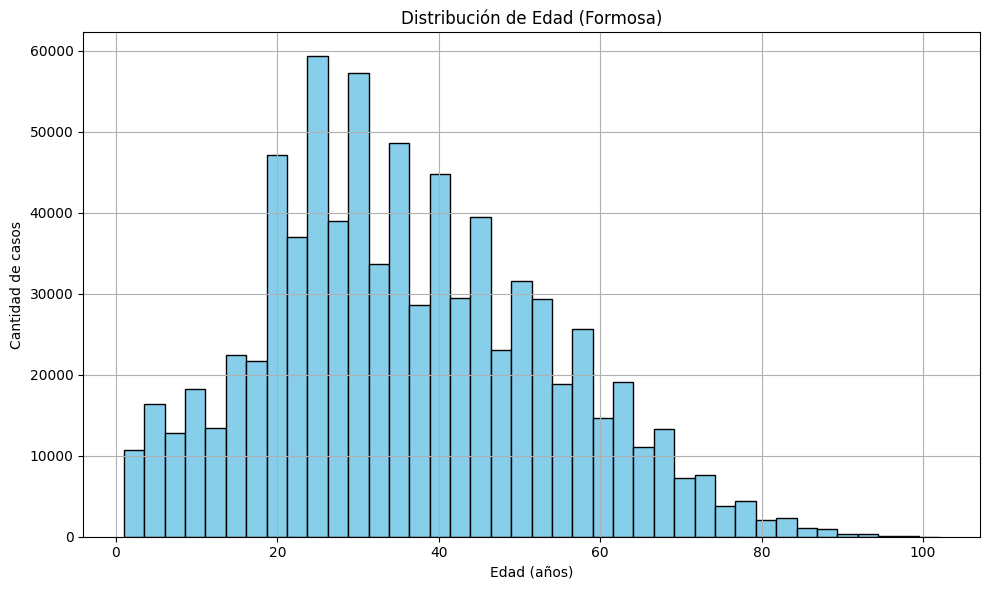

In [31]:
plt.figure(figsize=(10,6))
df['edad_estandarizada'].plot(kind='hist', bins=40, color='skyblue', edgecolor='black')
plt.title('Distribución de Edad (Formosa)')
plt.xlabel('Edad (años)')
plt.ylabel('Cantidad de casos')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_23296\1135843614.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  casos_departamento = df[df['clasificacion_caso'] == 'Confirmado'].groupby('departamento_residencia').size().sort_values()


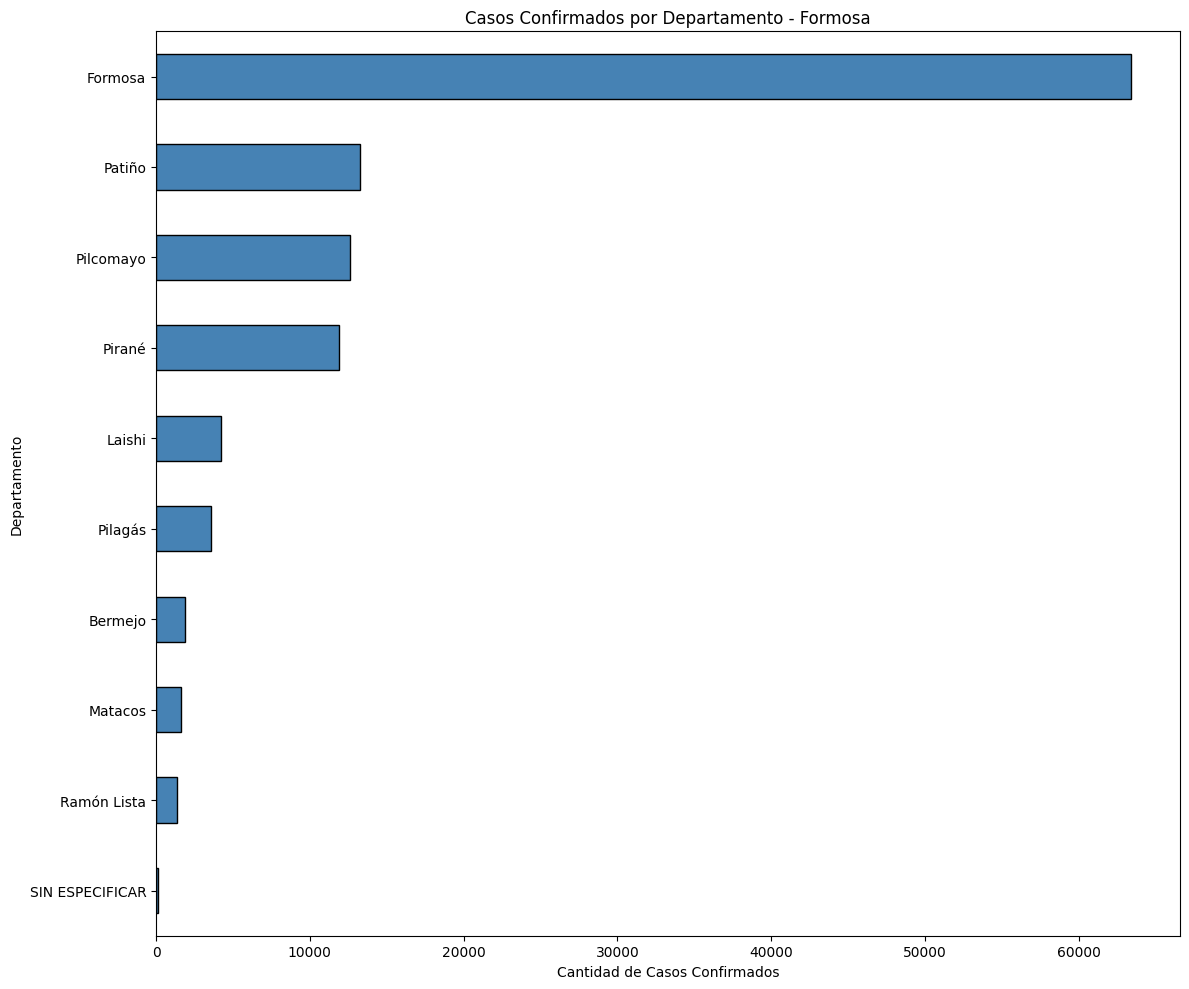

In [32]:
casos_departamento = df[df['clasificacion_caso'] == 'Confirmado'].groupby('departamento_residencia').size().sort_values()
plt.figure(figsize=(12,10))
casos_departamento.plot(kind='barh', color='steelblue', edgecolor='black')
plt.title('Casos Confirmados por Departamento - Formosa')
plt.xlabel('Cantidad de Casos Confirmados')
plt.ylabel('Departamento')
plt.tight_layout()
plt.show()

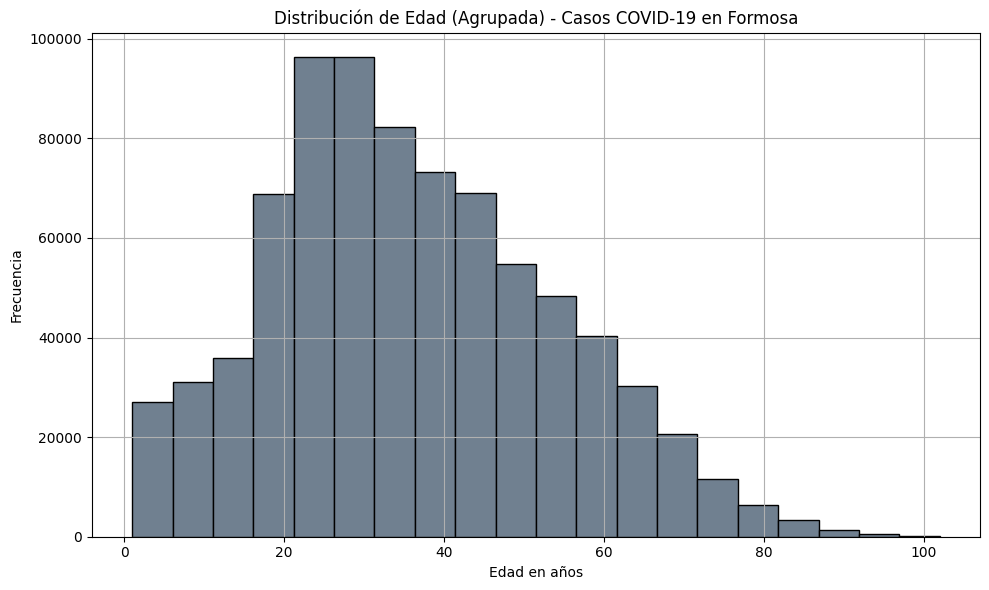

In [33]:
plt.figure(figsize=(10,6))
df['edad_estandarizada'].plot(kind='hist', bins=20, color='slategray', edgecolor='black')
plt.title('Distribución de Edad (Agrupada) - Casos COVID-19 en Formosa')
plt.xlabel('Edad en años')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

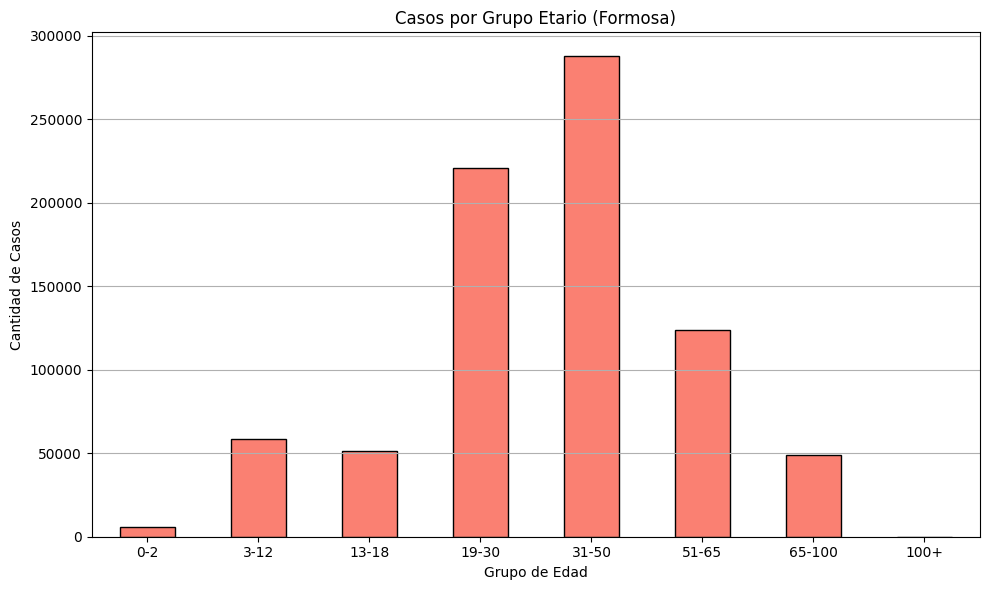

In [34]:
plt.figure(figsize=(10,6))
df['grupo_edad'].value_counts().sort_index().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Casos por Grupo Etario (Formosa)')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Casos')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


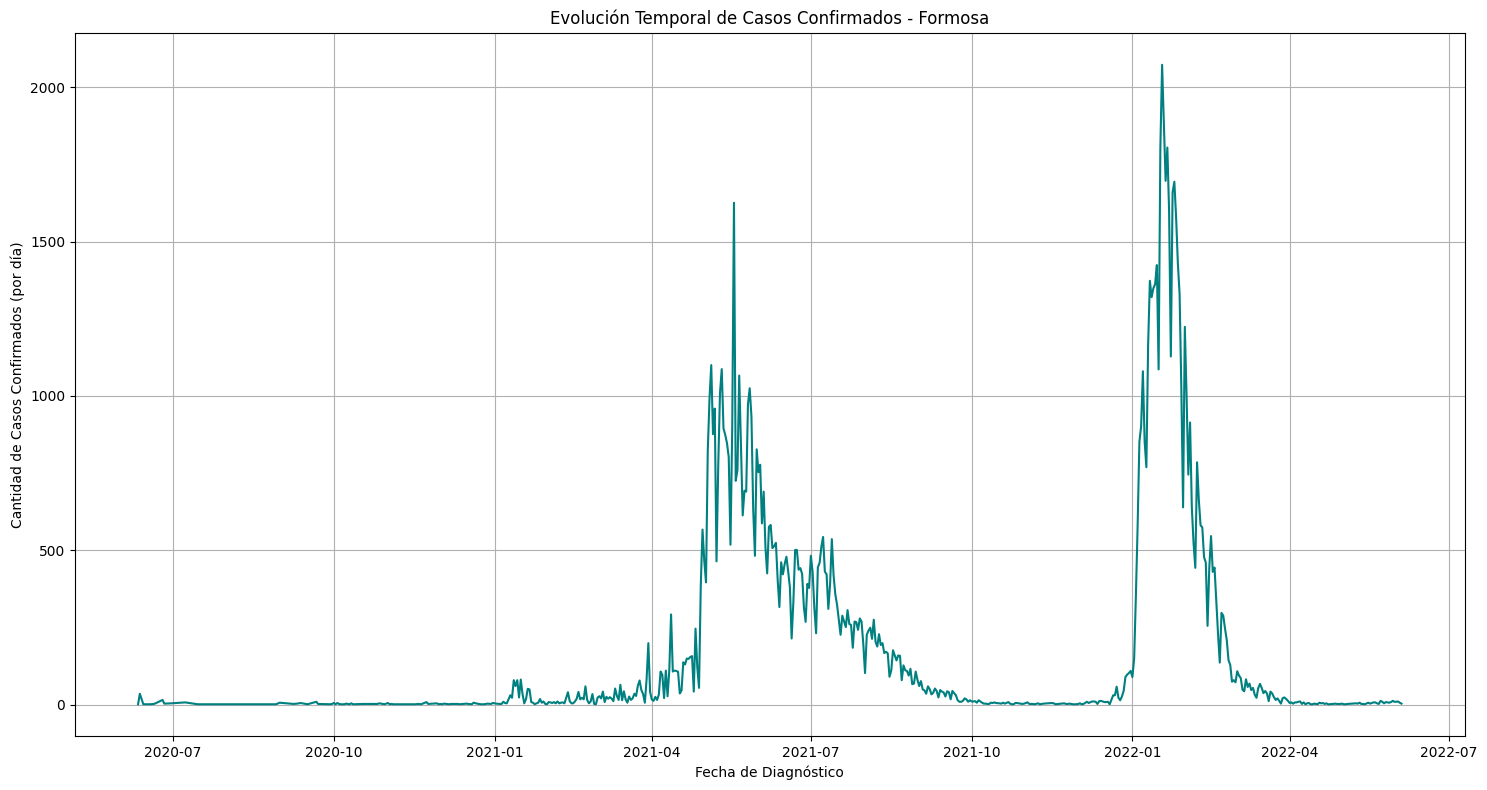

In [35]:
import seaborn as sns

casos_por_fecha = df[df['clasificacion_caso'] == 'Confirmado'].groupby('fecha_diagnostico').size().reset_index(name='cantidad')
plt.figure(figsize=(15,8))
sns.lineplot(data=casos_por_fecha, x='fecha_diagnostico', y='cantidad', color='teal')
plt.title('Evolución Temporal de Casos Confirmados - Formosa')
plt.xlabel('Fecha de Diagnóstico')
plt.ylabel('Cantidad de Casos Confirmados (por día)')
plt.grid(True)
plt.tight_layout()
plt.show()

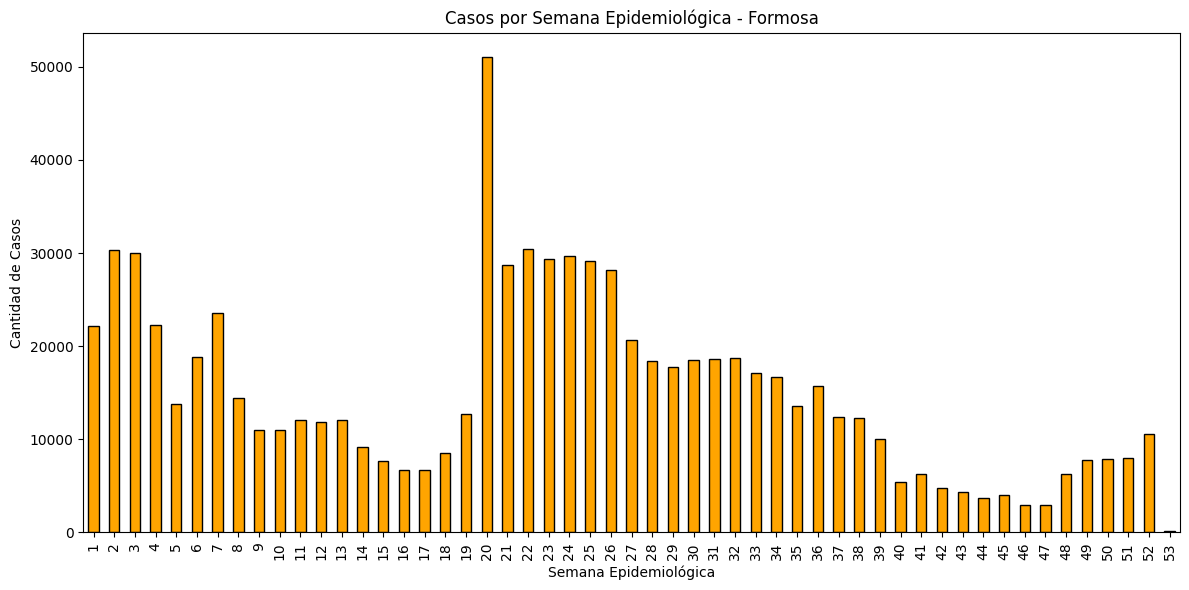

In [36]:
casos_por_semana = df.groupby('sem_epidemiologica').size()
plt.figure(figsize=(12,6))
casos_por_semana.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Casos por Semana Epidemiológica - Formosa')
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Cantidad de Casos')
plt.tight_layout()
plt.show()

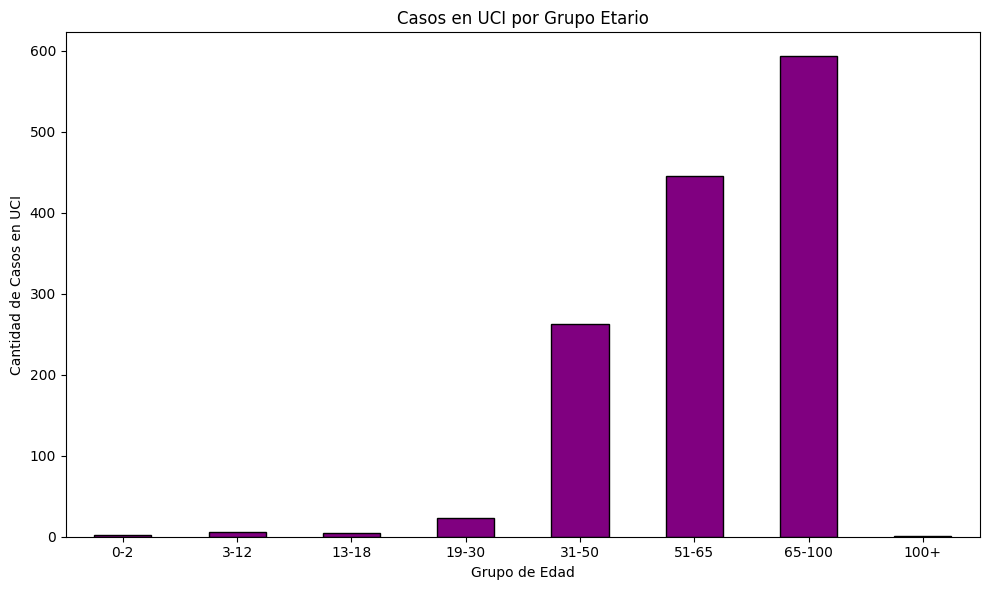

In [37]:
uci_por_edad = df[df['requirio_uci'] == True]['grupo_edad'].value_counts().sort_index()
plt.figure(figsize=(10,6))
uci_por_edad.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Casos en UCI por Grupo Etario')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Casos en UCI')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


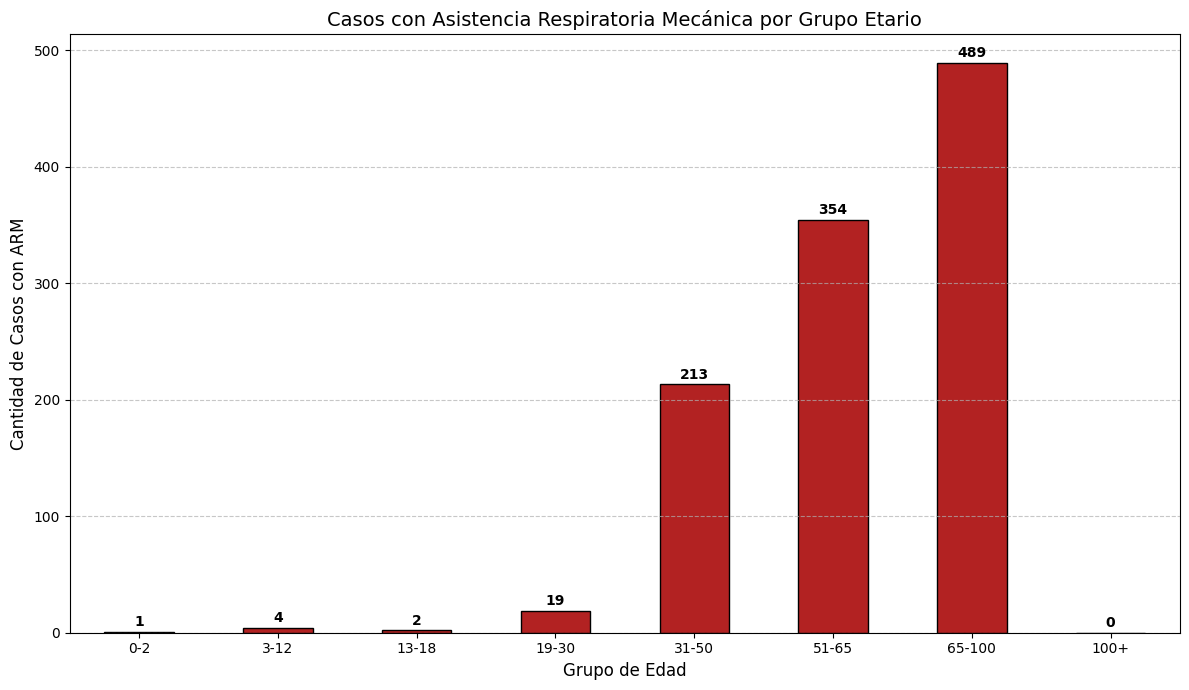

In [42]:
plt.figure(figsize=(12,7))
ax = arm_por_edad.plot(kind='bar', color='firebrick', edgecolor='black')
plt.title('Casos con Asistencia Respiratoria Mecánica por Grupo Etario', fontsize=14)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Cantidad de Casos con ARM', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

# Añadir etiquetas con los valores en cada barra
for i, v in enumerate(arm_por_edad):
    ax.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

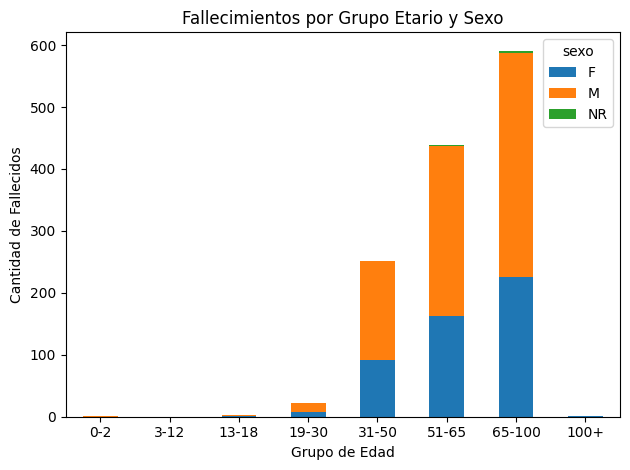

In [52]:
fallecidos = df[df['indicador_fallecimiento'] == True]
plt.figure(figsize=(12,6))
fallecidos.groupby('grupo_edad', observed=False)['sexo'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Fallecimientos por Grupo Etario y Sexo')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Fallecidos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

- 📊 **Análisis más significativos**: Comparación entre diferentes variables. ⬇️

**evolucion Temporal de la letalidad**

In [ ]:
# Crear variable que identifique las olas epidémicas (requiere definir las fechas)
df['ola_covid'] = pd.cut(
    df['fecha_diagnostico'].dt.strftime('%Y%m').astype(int),
    bins=[202003, 202008, 202101, 202106, 202201],
    labels=['primera_ola', 'segunda_ola', 'tercera_ola', 'cuarta_ola']
)

# Crear dummies para las olas
X = pd.get_dummies(df['ola_covid'], drop_first=True)
# Predecir severidad según la ola
y = df['requirio_uci']

In [ ]:
# Crear variable con días transcurridos entre síntomas y hospitalización
df['tiempo_sintomas_internacion'] = (df['fecha_internacion'] - df['fecha_inicio_sintomas']).dt.days
# Filtrar registros con fechas válidas
df_tiempo = df.dropna(subset=['tiempo_sintomas_internacion', 'edad_estandarizada'])

X = df_tiempo[['edad_estandarizada', 'sem_epidemiologica']]
y = df_tiempo['tiempo_sintomas_internacion']

In [ ]:
# Crear dataset por semana epidemiológica
letalidad_semanal = df.groupby('sem_epidemiologica').agg(
    casos=('clasificacion_caso', 'count'),
    fallecidos=('indicador_fallecimiento', 'sum')
)
letalidad_semanal['tasa_letalidad'] = letalidad_semanal['fallecidos'] / letalidad_semanal['casos']

X = letalidad_semanal.index.values.reshape(-1, 1)  # Semana como variable independiente
y = letalidad_semanal['tasa_letalidad']